<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/Classifiers_with_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important and helpful sources
https://www.youtube.com/watch?v=P47raNuzAW0
https://github.com/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
import gensim
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(42) #The random seed helps in the reproduction of the results

In [ ]:
dataset=pd.read_excel('posts.xlsx')

In [ ]:
dataset.shape

(9980, 2)

In [ ]:
dataset.head()

# Tokenization

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)
print("-----------------------------------------------")

import string
punctuations = string.punctuation
print(punctuations)

{'once', 'always', "'re", 'same', 'does', 'that', 'nobody', 'doing', 'his', 'anywhere', 'she', 'whereupon', "'m", 'three', 'ours', 'by', 'thence', 'perhaps', 'do', 'whole', 'whose', 'their', 'did', 'others', 'front', 'six', 'another', 'him', 'be', 'however', 'nor', 'call', 'made', 'while', 'am', 'will', 'why', 'yourselves', 'we', 'themselves', "n't", 'may', 'just', 'side', 'latter', 'for', 'someone', 'therein', 'might', 'because', 'done', 'became', 'himself', 'ten', 'under', 'else', 'they', 'get', 'how', 'amongst', 'most', 'very', 'though', 'what', 'meanwhile', 'now', '‘ve', 'whither', 'was', 'whom', 'back', 'seeming', 'were', 'fifteen', 'herself', 'across', '‘ll', 'being', 'already', 'with', "'s", 'up', 'in', 'least', 'toward', 'among', 'been', 'mostly', 'above', 'thru', 'first', 'take', 'anything', 'throughout', 'say', 'really', '‘m', 'behind', 'had', 'two', 'thus', 'cannot', 'neither', 'eight', 'using', 'becoming', 'this', 'without', "'ll", 'other', 'sixty', 'to', "'d", 'third', 'co

# Creating our tokenizer function

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
dataset['Question_body_Tokens'] = dataset['Question_body'].apply(spacy_tokenizer)

# Save the updated DataFrame to an Excel file

In [ ]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('posts.xlsx', index=False)

In [ ]:
dataset.head()

# Feature Vectors Engineering

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
pretrained_Word2vec_Model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def sent_vec(sent):
    vector_size = pretrained_Word2vec_Model.vector_size
    pretrained_res = np.zeros(vector_size)
    # print(wv_res)
    string = 1
    for w in sent:
        if w in pretrained_Word2vec_Model:
            string += 1
            pretrained_res += pretrained_Word2vec_Model[w]
    pretrained_res = pretrained_res/string
    return pretrained_res

In [ ]:
dataset['W2V_Vect'] = dataset['Tokens'].apply(sent_vec)

In [ ]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('posts.xlsx', index=False)

In [ ]:
dataset.head()

,Question_body,Label,Tokens,W2V_Vect
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei...","[0.042191066099016857, -0.03547005171186469, -..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net...","[0.020880169338650174, 0.029664357503255207, 0..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros...","[0.011846774961890244, 0.0009713521817835366, ..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c...","[0.046028193721064814, -0.027165794372558595, ..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f...","[0.06962245343679405, -0.020223778414439005, -..."


In [ ]:
x = dataset['W2V_Vect'].to_list()
y = dataset['Label'].to_list()

# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=125)

# Naive Bayes with W2vect

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
y_pred = nb_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')



Overall Accuracy: 0.6605657237936772
Class 0 - Precision: 0.8477546549835706, Recall: 0.7420901246404602, F1-score: 0.7914110429447853, Support: 1043
Class 1 - Precision: 0.7516158818097877, Recall: 0.8541448058761805, F1-score: 0.7996070726915521, Support: 953


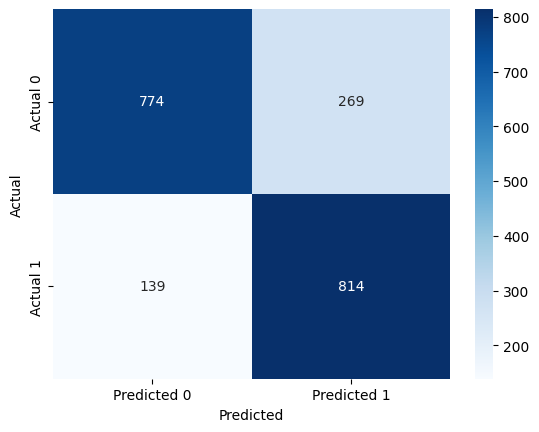

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with W2vect

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.7409507195813345
Class 0 - Precision: 0.9072052401746725, Recall: 0.7967401725790988, F1-score: 0.8483920367534457, Support: 1043
Class 1 - Precision: 0.8037037037037037, Recall: 0.9108079748163693, F1-score: 0.853910477127398, Support: 953


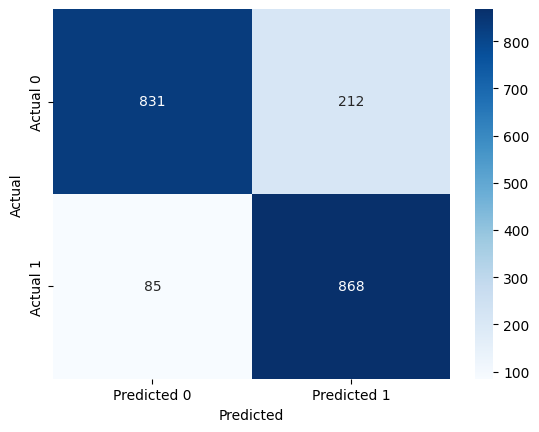

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with W2vect

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
y_pred = lg_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.8584729981378026
Class 0 - Precision: 0.9304347826086956, Recall: 0.9232981783317353, F1-score: 0.9268527430221366, Support: 1043
Class 1 - Precision: 0.9167533818938606, Recall: 0.9244491080797481, F1-score: 0.9205851619644723, Support: 953


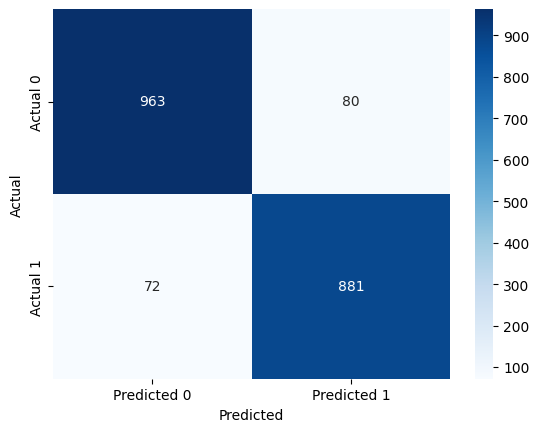

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decison Tree with W2vect

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
y_pred = dt_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.632719836400818
Class 0 - Precision: 0.7877906976744186, Recall: 0.7794822627037392, F1-score: 0.7836144578313253, Support: 1043
Class 1 - Precision: 0.7614107883817427, Recall: 0.770199370409234, F1-score: 0.7657798643714138, Support: 953


# Confusion Matrix for DT Model :
Display the matrix with TP, TN, FP, FN counts.
https://chatgpt.com/share/2f5dfec4-026c-4017-944e-7720f539930f

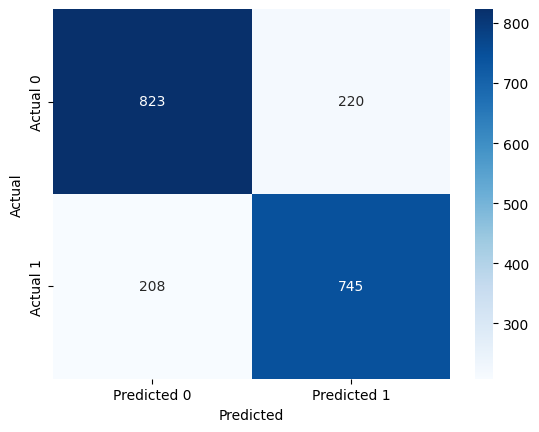

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with W2vect

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
# Compute predictions
y_pred = svm_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.8689138576779026
Class 0 - Precision: 0.9320574162679426, Recall: 0.9338446788111218, F1-score: 0.9329501915708812, Support: 1043
Class 1 - Precision: 0.9274447949526814, Recall: 0.925498426023085, F1-score: 0.9264705882352942, Support: 953


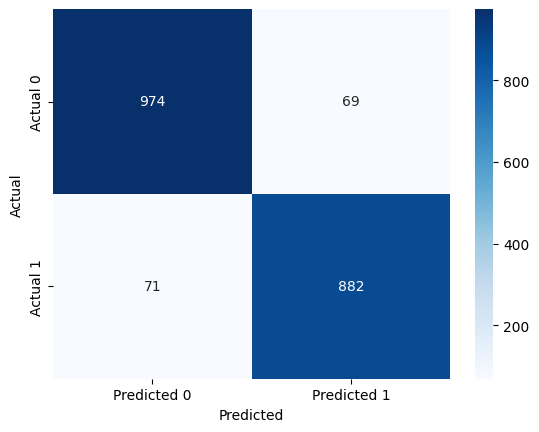

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()